In [91]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [251]:
def generate_test_data(N, p):
    features = pd.DataFrame([np.random.randn(p) for x in range(N)])

    b = np.random.normal(size = p)

    e = np.random.randn() 
    Y = features.apply(lambda row: sum(row * b) + e, axis = 1)

    features['Y'] = Y

    return (b, features)

In [275]:
def compare_p_n():

    N = 100
    alphas = np.logspace(-10, 10, 100) 
    ps = [20, 100, 1000]
#     alphas = [0.0001, 0.01, 10, 100] 
    errors = {}

    for p in ps:

        b, data = generate_test_data(N, p)
        train, test = train_test_split(data, train_size = 0.7)
        
        mses = []
        
        for l in alphas:

            estimator = Ridge(alpha = l)
            estimator.fit(train.drop('Y', axis = 1), train['Y']) 
                                
            y_pred = estimator.predict(test.drop('Y', axis = 1))
            y_true = test['Y']
                
            mse = mean_squared_error(y_true, y_pred)
            
#            print "for alpha {}, mean: {}, std: {}".format(l, np.mean(estimator.coef_), np.std(estimator.coef_))
            
#            mse = mean_squared_error(b, estimator.coef_)
            
            mses.append(mse)
            
        errors[p] = mses

    return (alphas, errors)

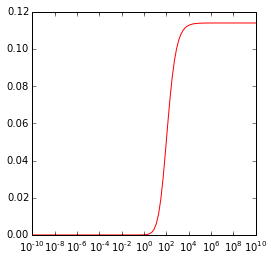

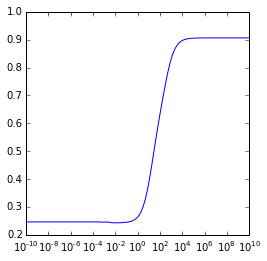

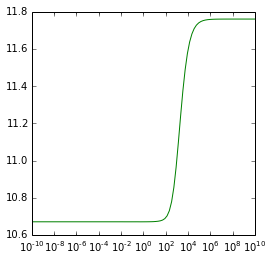

In [276]:
experiments = [compare_p_n() for x in range(1)]

_20 = [e[1][20] for e in experiments]
_100 = [e[1][100] for e in experiments]
_1000 = [e[1][1000] for e in experiments]

def add(a, b):
    return np.array(a) + np.array(b)

_20 = map(lambda x: x / 100, reduce(add, _20))
_100 = map(lambda x: x / 100, reduce(add, _100))
_1000 = map(lambda x: x / 100, reduce(add, _1000))

alphas = experiments[0][0]

#(alphas, errs) = compare_p_n()

#colors = ['b', 'r', 'g', 'c', 'k', 'y', 'm']

plt.rcParams["figure.figsize"] = [4, 4]

plt.plot(alphas, _20, 'r')
pyplot.xscale('log')
plt.show()

plt.plot(alphas, _100, 'b')
pyplot.xscale('log')
plt.show()

plt.plot(alphas, _1000, 'g')
pyplot.xscale('log')
plt.show()

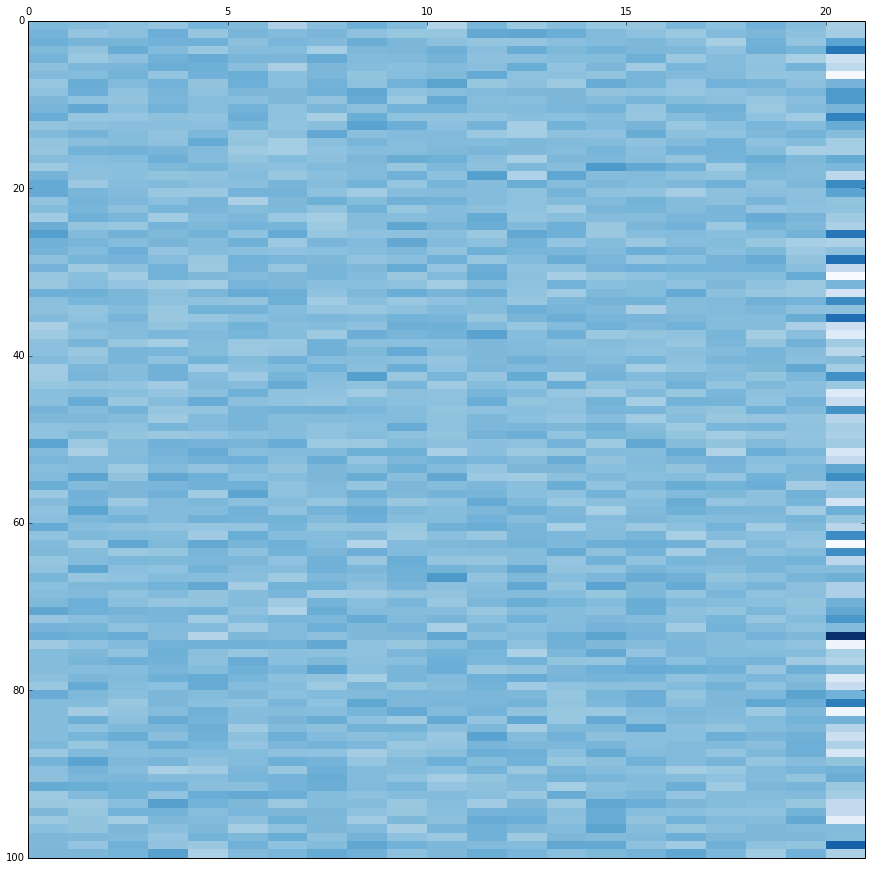

In [161]:
(b, data) = generate_test_data(100, 20)

plt.rcParams["figure.figsize"] = [15, 15]
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
ax.invert_yaxis()
ax.xaxis.tick_top()

plt.xlim(0, 21)

plt.show()

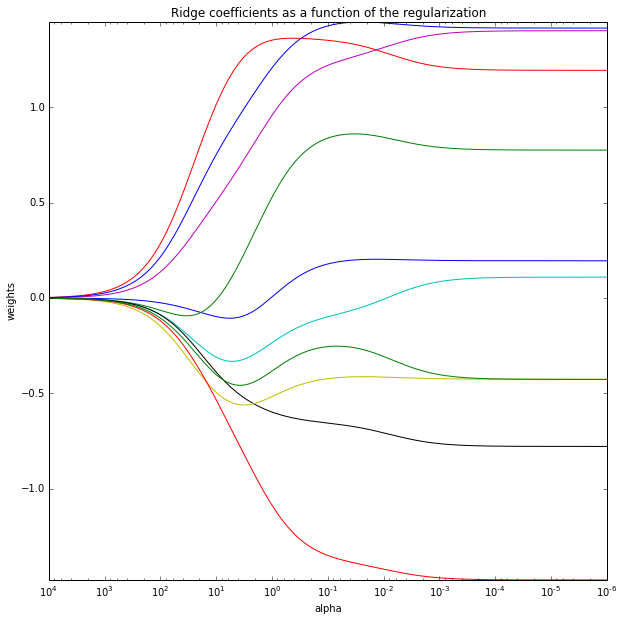

In [272]:
n_alphas = 200
alphas = np.logspace(-6, 4, n_alphas)
#alphas = np.logspace(-10, -2, n_alphas)
clf = Ridge()

(b, data) = generate_test_data(N = 10, p = 10)

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(data.drop('Y', axis = 1), data['Y'])
    #clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

plt.rcParams["figure.figsize"] = [8, 8]
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.show()